# Trade Markets Analytics

# 1.Introduction

In [314]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [315]:
# Loading datasets
users = pd.read_csv('/content/Users.csv')
trades = pd.read_csv('/content/Trades.csv')

# 1.1 Users

In [316]:
users.shape

(1000, 5)

In [317]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   login_hash    1000 non-null   object
 1   server_hash   1000 non-null   object
 2   country_hash  1000 non-null   object
 3   currency      1000 non-null   object
 4   enable        1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [318]:
users.head(3)

,login_hash,server_hash,country_hash,currency,enable
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1


In [319]:
users['server_hash'].unique()

array(['76791A893BDB9A68E8EE44898D581A60',
       '3D1F7E00251C43107EF39F55300781DB',
       '54203B42716FE7C40138AE6C4913EBBC'], dtype=object)

In [320]:
users['server_hash'] = users['server_hash'].map({'76791A893BDB9A68E8EE44898D581A60':'S1','3D1F7E00251C43107EF39F55300781DB':'S2','54203B42716FE7C40138AE6C4913EBBC':'S3'})

In [321]:
# Checking Null values
users.isna().sum()

login_hash      0
server_hash     0
country_hash    0
currency        0
enable          0
dtype: int64

In [322]:
servers = users['server_hash'].unique()
print('Number of servers:',len(servers))
country = users['country_hash'].unique()
print('Number of countries:',len(country))

Number of servers: 3
Number of countries: 19


In [323]:
users['enable'].value_counts()

1    973
0     27
Name: enable, dtype: int64

In [324]:
cur = users['currency'].value_counts().to_frame('Count')
cur

,Count
USD,906
AUD,91
NZD,2
EUR,1


### EDA: Users

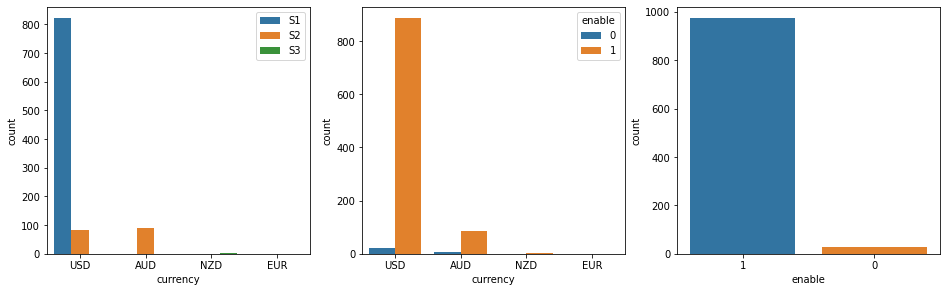

In [325]:
# Data Visualization
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(data = users, x='currency',order=users['currency'].value_counts().index,hue='server_hash')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
sns.countplot(data = users, x='currency',order=users['currency'].value_counts().index,hue='enable')
plt.subplot(2,3,3)
sns.countplot(data = users, x='enable',order=users['enable'].value_counts().index)
plt.show()

Most of the users trading activity is on server S1 with USD and only few users have their accounts disabled.

#1.2 Trades

In [326]:
trades.head(3)

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0


In [327]:
trades.shape

(100000, 11)

In [328]:
trades['server_hash'].unique()

array(['2F1CA40D76D7E6165DBA3924CE0D3B5C',
       '3D1F7E00251C43107EF39F55300781DB',
       '54203B42716FE7C40138AE6C4913EBBC'], dtype=object)

In [329]:
trades['server_hash'] = trades['server_hash'].map({'2F1CA40D76D7E6165DBA3924CE0D3B5C':'S4','76791A893BDB9A68E8EE44898D581A60':'S1','3D1F7E00251C43107EF39F55300781DB':'S2','54203B42716FE7C40138AE6C4913EBBC':'S3'})

In [330]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   login_hash    100000 non-null  object 
 1   ticket_hash   100000 non-null  object 
 2   server_hash   100000 non-null  object 
 3   symbol        100000 non-null  object 
 4   digits        100000 non-null  int64  
 5   cmd           100000 non-null  int64  
 6   volume        100000 non-null  int64  
 7   open_time     100000 non-null  object 
 8   open_price    100000 non-null  float64
 9   close_time    100000 non-null  object 
 10  contractsize  99993 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB


In [331]:
trades.describe()

,digits,cmd,volume,open_price,contractsize
count,100000.000000,100000.000000,100000.000000,100000.000000,99993.000000
mean,3.214250,0.448170,17.986650,1262.544975,44856.840239
std,1.463171,0.497309,100.438786,2585.110285,49669.111281
min,0.000000,0.000000,0.000000,0.591670,1.000000
25%,2.000000,0.000000,1.000000,1.190937,100.000000
50%,2.000000,0.000000,3.000000,1887.590000,100.000000
75%,5.000000,1.000000,10.000000,1967.152500,100000.000000
max,5.000000,1.000000,10000.000000,28795.000000,100000.000000


In [332]:
trades.isna().sum()

login_hash      0
ticket_hash     0
server_hash     0
symbol          0
digits          0
cmd             0
volume          0
open_time       0
open_price      0
close_time      0
contractsize    7
dtype: int64

In [333]:
# Number of contracts with size 100 and 100000 are significantly high and almost equal, we can drop the rows rather than imputation
trades.dropna(axis=0,inplace=True)

### EDA: Trades

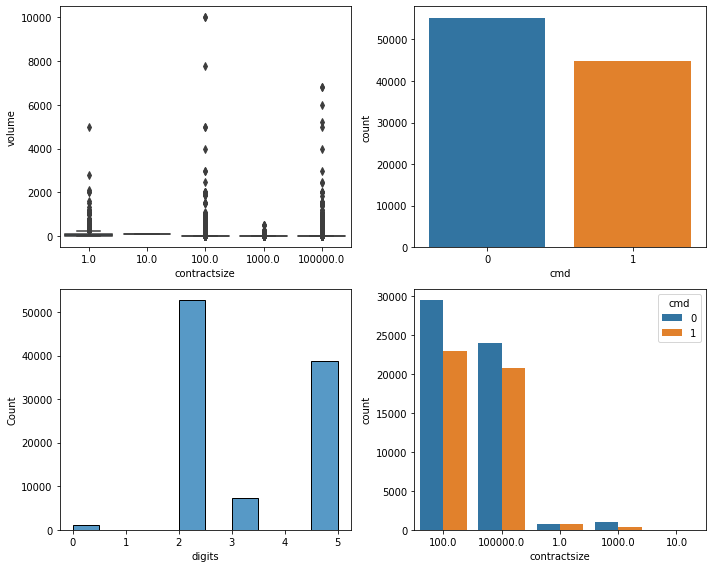

In [334]:
# Data Visualization
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(data = trades, x='contractsize',y=trades['volume'])
plt.subplot(2,2,2)
sns.countplot(data = trades, x='cmd',order=trades['cmd'].value_counts().index)
plt.subplot(2,2,3)
sns.histplot(trades['digits'],bins=10)
plt.subplot(2,2,4)
sns.countplot( data = trades, x='contractsize',order=trades['contractsize'].value_counts().index,hue='cmd')
plt.tight_layout()
plt.show()

Some trades have higher volume and could be potenital outliers

Most of the contract sizes are of 100 and 10000, buy orders are little high than sell and most trades have 2 and 5 number of significant digits after the decimal place. 

In [335]:
cur_pairs = trades.symbol.value_counts().to_frame('Orders')
cur_pairs[cur_pairs['Orders']>1000].head()

,Orders
XAUUSD,49165
EURUSD,17609
GBPUSD,6723
XTIUSD,2352
EURCHF,1989


XAUUSD and EURUSD are two major currency pairs.

In [336]:
trades['close_time'] = pd.to_datetime(trades['close_time'])
trades['open_time'] = pd.to_datetime(trades['open_time'])

# 2.Data Set

### Joining the datasets

In [337]:
df = pd.merge(users, trades, how='left', on=['login_hash','server_hash'])

In [338]:
df.shape

(36891, 14)

In [339]:
df.isna().sum()/df.shape[0]

login_hash      0.000000
server_hash     0.000000
country_hash    0.000000
currency        0.000000
enable          0.000000
ticket_hash     0.022336
symbol          0.022336
digits          0.022336
cmd             0.022336
volume          0.022336
open_time       0.022336
open_price      0.022336
close_time      0.022336
contractsize    0.022336
dtype: float64

In [340]:
# Percentage of null values is low
df.dropna(axis=0,inplace=True)

### Feature engineering

In [341]:
df['time_duration'] = df['close_time']-df['open_time']
df['time_duration_hr'] = df['time_duration'].astype('timedelta64[h]')

df['open_year'] = df['open_time'].dt.year 
df['close_year'] = df['close_time'].dt.year 
df['open_month'] = df['open_time'].dt.month 
df['close_month'] = df['close_time'].dt.month 
df['open_day'] = df['open_time'].dt.day 
df['close_day'] = df['close_time'].dt.day

df['cmd'] = df['cmd'].astype(int)
df['digits'] = df['digits'].astype(int)
df['open_year'] = df['open_year'].astype(np.object)
df['close_year'] = df['close_year'].astype(np.object)

In [342]:
df.columns

Index(['login_hash', 'server_hash', 'country_hash', 'currency', 'enable',
       'ticket_hash', 'symbol', 'digits', 'cmd', 'volume', 'open_time',
       'open_price', 'close_time', 'contractsize', 'time_duration',
       'time_duration_hr', 'open_year', 'close_year', 'open_month',
       'close_month', 'open_day', 'close_day'],
      dtype='object')

In [343]:
df.head(3)

,login_hash,server_hash,country_hash,currency,enable,ticket_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,time_duration,time_duration_hr,open_year,close_year,open_month,close_month,open_day,close_day
5,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,079A2E7D6C17E4F82D0F2215E0F8CBC9,CHFJPY,3,1,1.0,2020-08-12 15:53:30,117.15000,2020-08-12 15:55:52,100000.0,0 days 00:02:22,0.0,2020,2020,8,8,12,12
6,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9CCEAE55FF215C71E3486890C2908467,AUDNZD,5,0,5.0,2020-08-31 08:54:34,1.09184,2020-08-31 12:17:38,100000.0,0 days 03:23:04,3.0,2020,2020,8,8,31,31
7,A244C34BC761A97487485F0FF5A43A49,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,9AEEAF4DBFD3BC3D0C74E0547A5E63CC,NZDCHF,5,1,2.0,2020-08-26 16:46:48,0.59741,2020-11-10 11:46:38,100000.0,75 days 18:59:50,1818.0,2020,2020,8,11,26,10


In [344]:
df_train = df.copy()

cols_drop = ['login_hash','ticket_hash','open_time','close_time','time_duration']

df_train.drop(labels=cols_drop,axis=1,inplace=True)

In [345]:
df_train.head(3)

,server_hash,country_hash,currency,enable,symbol,digits,cmd,volume,open_price,contractsize,time_duration_hr,open_year,close_year,open_month,close_month,open_day,close_day
5,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,CHFJPY,3,1,1.0,117.15000,100000.0,0.0,2020,2020,8,8,12,12
6,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,AUDNZD,5,0,5.0,1.09184,100000.0,3.0,2020,2020,8,8,31,31
7,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,NZDCHF,5,1,2.0,0.59741,100000.0,1818.0,2020,2020,8,11,26,10


In [346]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36067 entries, 5 to 36872
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   server_hash       36067 non-null  object 
 1   country_hash      36067 non-null  object 
 2   currency          36067 non-null  object 
 3   enable            36067 non-null  int64  
 4   symbol            36067 non-null  object 
 5   digits            36067 non-null  int64  
 6   cmd               36067 non-null  int64  
 7   volume            36067 non-null  float64
 8   open_price        36067 non-null  float64
 9   contractsize      36067 non-null  float64
 10  time_duration_hr  36067 non-null  float64
 11  open_year         36067 non-null  object 
 12  close_year        36067 non-null  object 
 13  open_month        36067 non-null  int64  
 14  close_month       36067 non-null  int64  
 15  open_day          36067 non-null  int64  
 16  close_day         36067 non-null  int64 

In [347]:
df['server_hash'].value_counts()

S2    35960
S3      107
Name: server_hash, dtype: int64

### Feature encoding

Performing labelling to non-int data

In [348]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [349]:
df_sym = pd.get_dummies(df['symbol'], drop_first=True)
df_county = pd.get_dummies(df['country_hash'], drop_first=True)
df_cur = pd.get_dummies(df['currency'], drop_first=True)
df_ser = pd.get_dummies(df['server_hash'], drop_first=True)
df_openyr = pd.get_dummies(df['open_year'], drop_first=True)
df_closeyr = pd.get_dummies(df['close_year'], drop_first=True)
df_train2 = pd.concat((df_train,df_cur,df_sym,df_ser,df_county,df_openyr,df_closeyr), axis=1)

In [350]:
df_train2

,server_hash,country_hash,currency,enable,symbol,digits,cmd,volume,open_price,contractsize,time_duration_hr,open_year,close_year,open_month,close_month,open_day,close_day,NZD,USD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,AUS200,BCHUSD,CADCHF,CADJPY,CHCUSD,CHFJPY,EURAUD,EURCAD,EURCHF,EURGBP,EURJPY,EURNZD,EURSGD,EURUSD,GBPAUD,GBPCAD,GBPCHF,GBPJPY,GBPNZD,GBPUSD,HK50,NAS100,NZDCAD,NZDCHF,NZDJPY,NZDUSD,US30,US500,USDCAD,USDCHF,USDJPY,USDNOK,USDSGD,USIDX,XAGUSD,XAUUSD,XTIUSD,S3,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,2022
5,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,CHFJPY,3,1,1.0,117.15000,100000.0,0.0,2020,2020,8,8,12,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,AUDNZD,5,0,5.0,1.09184,100000.0,3.0,2020,2020,8,8,31,31,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,NZDCHF,5,1,2.0,0.59741,100000.0,1818.0,2020,2020,8,11,26,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,AUDNZD,5,1,15.0,1.08127,100000.0,1005.0,2020,2020,8,9,7,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,GBPAUD,5,1,1.0,1.81941,100000.0,1.0,2020,2020,8,8,27,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36868,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,GBPUSD,5,1,5.0,1.32400,100000.0,0.0,2020,2020,8,8,28,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36869,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,XAUUSD,2,0,1.0,1956.86000,100.0,0.0,2020,2020,8,8,28,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36870,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,XAUUSD,2,0,1.0,1926.99000,100.0,0.0,2020,2020,8,8,28,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36871,S2,4442E4AF0916F53A07FB8CA9A49B98ED,AUD,1,XAUUSD,2,1,2.0,1936.33000,100.0,0.0,2020,2020,8,8,28,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [351]:
df_train2.shape

(36067, 73)

In [352]:
cols = ['symbol','country_hash','currency','server_hash','open_year','close_year']

In [353]:
df_train2.drop(labels=cols,axis=1,inplace=True)

In [354]:
df_train2.head(3)

,enable,digits,cmd,volume,open_price,contractsize,time_duration_hr,open_month,close_month,open_day,close_day,NZD,USD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,AUS200,BCHUSD,CADCHF,CADJPY,CHCUSD,CHFJPY,EURAUD,EURCAD,EURCHF,EURGBP,EURJPY,EURNZD,EURSGD,EURUSD,GBPAUD,GBPCAD,GBPCHF,GBPJPY,GBPNZD,GBPUSD,HK50,NAS100,NZDCAD,NZDCHF,NZDJPY,NZDUSD,US30,US500,USDCAD,USDCHF,USDJPY,USDNOK,USDSGD,USIDX,XAGUSD,XAUUSD,XTIUSD,S3,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,2022
5,1,3,1,1.0,117.15000,100000.0,0.0,8,8,12,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,1,5,0,5.0,1.09184,100000.0,3.0,8,8,31,31,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,5,1,2.0,0.59741,100000.0,1818.0,8,11,26,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [355]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36067 entries, 5 to 36872
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   enable                            36067 non-null  int64  
 1   digits                            36067 non-null  int64  
 2   cmd                               36067 non-null  int64  
 3   volume                            36067 non-null  float64
 4   open_price                        36067 non-null  float64
 5   contractsize                      36067 non-null  float64
 6   time_duration_hr                  36067 non-null  float64
 7   open_month                        36067 non-null  int64  
 8   close_month                       36067 non-null  int64  
 9   open_day                          36067 non-null  int64  
 10  close_day                         36067 non-null  int64  
 11  NZD                               36067 non-null  uint8  
 12  USD 

### Feature scaling

In order to proceed with the clustering, let's perform scaling to bring features to same scale

In [356]:
sc = StandardScaler()

df_scaled = sc.fit_transform(df_train2)

In [357]:
df = pd.DataFrame(df_scaled)
df.columns = df_train2.columns
df.head(2)

,enable,digits,cmd,volume,open_price,contractsize,time_duration_hr,open_month,close_month,open_day,close_day,NZD,USD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,AUS200,BCHUSD,CADCHF,CADJPY,CHCUSD,CHFJPY,EURAUD,EURCAD,EURCHF,EURGBP,EURJPY,EURNZD,EURSGD,EURUSD,GBPAUD,GBPCAD,GBPCHF,GBPJPY,GBPNZD,GBPUSD,HK50,NAS100,NZDCAD,NZDCHF,NZDJPY,NZDUSD,US30,US500,USDCAD,USDCHF,USDJPY,USDNOK,USDSGD,USIDX,XAGUSD,XAUUSD,XTIUSD,S3,221CDFB73049678E244380B45872CBB2,4442E4AF0916F53A07FB8CA9A49B98ED,4A2581E346483DA488A11C4B2D2DE97E,551FE18EF47D4E6E9D943B9A68ADA21D,77DAB2F81A6C8C9136EFBA7AB2C4C0F2,89F9C9F489BE2A83CF57E53B9197D288,907EBA32D950BFAB68227FD7EA22999B,A67D4CBDD1B59E0FFCCC6BAFC83EB033,A8F809C99C4A996780C3046B9B594195,AE54A5C026F31ADA088992587D92CB3A,C51ED580EA5E20C910D951F692512B4D,2022
0,0.189635,-1.253201,1.050487,-0.165768,-0.199576,0.460224,-0.197582,0.0,-0.070859,-0.507350,-0.502584,-0.035345,-1.870212,-0.013933,-0.034549,-0.084383,-0.375932,-0.005266,-0.010532,-0.022345,-0.025261,-0.019706,33.044506,-0.026337,-0.035736,-0.016653,-0.025804,-0.048603,-0.041497,-0.005266,-0.884737,-0.03763,-0.03908,-0.018989,-0.042491,-0.0298,-0.540569,-0.007447,-0.024137,-0.037998,-0.0298,-0.045953,-0.037998,-0.038362,-0.012899,-0.034549,-0.041497,-0.05139,-0.013933,-0.010532,-0.009121,-0.050845,-0.450283,-0.027371,-0.054548,-0.010532,0.28103,-0.073729,-0.14383,-0.032901,-0.199761,-0.040821,-0.025804,-0.041497,-0.047149,-0.035345,-0.196739
1,0.189635,0.474663,-0.951940,-0.060846,-0.284855,0.460224,-0.196678,0.0,-0.070859,1.668259,1.671897,-0.035345,-1.870212,-0.013933,-0.034549,11.850705,-0.375932,-0.005266,-0.010532,-0.022345,-0.025261,-0.019706,-0.030262,-0.026337,-0.035736,-0.016653,-0.025804,-0.048603,-0.041497,-0.005266,-0.884737,-0.03763,-0.03908,-0.018989,-0.042491,-0.0298,-0.540569,-0.007447,-0.024137,-0.037998,-0.0298,-0.045953,-0.037998,-0.038362,-0.012899,-0.034549,-0.041497,-0.05139,-0.013933,-0.010532,-0.009121,-0.050845,-0.450283,-0.027371,-0.054548,-0.010532,0.28103,-0.073729,-0.14383,-0.032901,-0.199761,-0.040821,-0.025804,-0.041497,-0.047149,-0.035345,-0.196739


#3.Modelling

In [358]:
from sklearn.cluster import KMeans

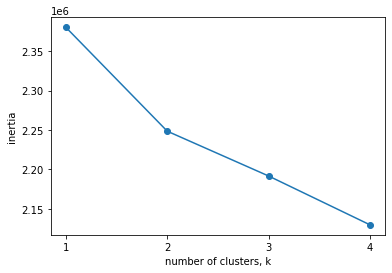

In [359]:
#km = KMeans(n_clusters=10)

ks = range(1,5)
inertias = []

for k in ks:
    # KMeans instance with k clusters
    model=KMeans(n_clusters=k)
    
    # Fitting model to data
    model.fit(df)
    
    inertias.append(model.inertia_)
    
# Plotting ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

From the elbow plot 3 seems to be better choice of cluster numbers

In [360]:
model=KMeans(n_clusters=3)
# Fitting model
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [361]:
df['Cluster'] = model.labels_

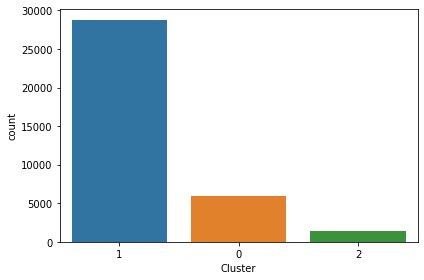

In [362]:
plt.figure(figsize=(6,4))
sns.countplot(df['Cluster'],order=df['Cluster'].value_counts().index)
plt.tight_layout()
plt.show()

# 4.Principal Component Analysis

Performing PCA to find out three principal components

In [363]:
from sklearn.decomposition import PCA

In [364]:
# PCA model with 3 components
pca = PCA(n_components=3)

# Fitting the PCA instance to the scaled data
pca.fit(df_scaled)

# Transforming the scaled data
pca_features = pca.transform(df_scaled)

# The shape of pca_features
print(pca_features.shape)

(36067, 3)


In [365]:
pca.explained_variance_

array([3.87705186, 2.72430453, 2.22038284])

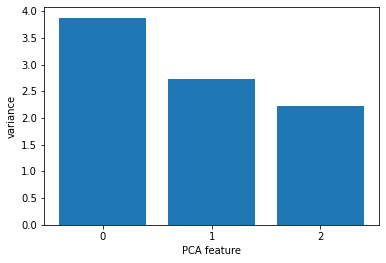

In [366]:
features = range(0,pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Creating 3-D plot to visualize the 3 principal components

In [367]:
import plotly.express as px

In [368]:
pca = PCA(n_components=3)
components = pca.fit_transform(df_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Cluster'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Thank you!